# Document classification with CountVectorizer and TdIdf model

## Definitions

- Document: a piece of text
- Corpus: a collection of documents

In [ ]:
from sklearn.datasets import fetch_20newsgroups

categories = ["alt.atheism", "soc.religion.christian", "comp.graphics", "sci.med"]
twenty_train = fetch_20newsgroups(
    subset="train",
    categories=categories,
    shuffle=True,
    random_state=42,
    remove=("headers", "footers", "quotes"),
)
twenty_train

In [2]:
# number of documents in the training dataset
len(twenty_train.data)

2257

In [3]:
# document example
print(twenty_train.data[0])

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.


(-0.5, 399.5, 199.5, -0.5)

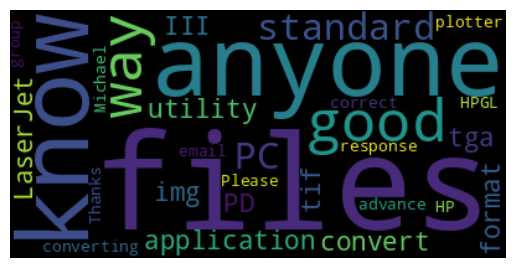

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud().generate(twenty_train.data[0])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

In [5]:
# available classes for document classification
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [6]:
# array of classes ids for supervised training
# one for each document in the dataset
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

# Extracting features from text files

## Bag of words (BOW)

Each word is assigned to an id: dictionary id -> word.

For each document `#i` count the number of occurrencies of each word `w`.
Store the results for all the words in the bag of words in a matrix `X[i,j]`.

The size of the matrix is `num docs x num words`.

The matrix will be really sparse, since we do not use all the words with the same
frequency. Use a `scipy.sparse` matrix to save memory.

Most of the words in a text are connectors, articles etc. We want to filter them
out, since they usually do not convey the majority of each sentence's meaning.

To filter these small words, use the
[`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)
class.

In [7]:
stopfrom sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words="english")
x_train_counts = count_vect.fit_transform(twenty_train.data)
x_train_counts

<2257x28559 sparse matrix of type '<class 'numpy.int64'>'
	with 153378 stored elements in Compressed Sparse Row format>

In [8]:
# number of words in the BOW
x_train_counts.shape[1]

28559

In [9]:
count_vect.vocabulary_

{'does': 8916,
 'know': 15020,
 'good': 11876,
 'way': 27777,
 'standard': 24367,
 'pc': 19253,
 'application': 3273,
 'pd': 19269,
 'utility': 27084,
 'convert': 6990,
 'tif': 25828,
 'img': 13353,
 'tga': 25607,
 'files': 10790,
 'laserjet': 15256,
 'iii': 13273,
 'format': 11139,
 'like': 15603,
 'converting': 6994,
 'hpgl': 12973,
 'hp': 12967,
 'plotter': 19873,
 'email': 9527,
 'response': 22070,
 'correct': 7108,
 'group': 12106,
 'thanks': 25620,
 'advance': 2514,
 'michael': 16783,
 'hi': 12667,
 'problem': 20528,
 'hope': 12893,
 'gurus': 12198,
 'help': 12561,
 'solve': 23987,
 'background': 3911,
 'rectangular': 21526,
 'mesh': 16686,
 'uv': 27110,
 'domain': 8934,
 'mapping': 16249,
 '3d': 923,
 'bezier': 4346,
 'patch': 19180,
 '2d': 738,
 'area': 3381,
 'inside': 13918,
 'trimming': 26281,
 'loop': 15835,
 'rendered': 21837,
 'set': 23288,
 'curve': 7562,
 'segments': 23140,
 'sake': 22680,
 'notation': 18085,
 'cells': 5525,
 'split': 24238,
 'individual': 13649,
 'smal

## TF and TF-idf

- Term frequency: do not count the occurrencies of a word as longer documents have
more occurrencies, use the frequency instead.
- Inverse document frequency: words that appear with higher frequency in many
documents are considered less important than words with higher frequency in a
small portion of the dataset.

The [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html#sklearn.feature_extraction.text.TfidfTransformer)
implements both this operations.

The `tf-idf` formula for a term `t` in a document `d` from a dataset of `n`
documents is the following:

$tf\_idf(t,d) = tf(t,d) \cdot idf(t)$ where $idf(t) = 1 + \log \frac{n}{df(t)}$ and
$tf$ is the term frequency in the document.

In [10]:
# we can use sklearn.feature_extraction.text.TfidfVectorizer¶ directly on text
# if we didn't apply the CountVectorizer first
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer(use_idf=False)
x_train_tf_no_idf = tf_transformer.fit_transform(x_train_counts)
x_train_tf_no_idf

<2257x28559 sparse matrix of type '<class 'numpy.float64'>'
	with 153378 stored elements in Compressed Sparse Row format>

In [11]:
tf_transformer = TfidfTransformer(use_idf=True)
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)
x_train_tf_idf

<2257x28559 sparse matrix of type '<class 'numpy.float64'>'
	with 153378 stored elements in Compressed Sparse Row format>

## Other vector transformations

The following list gives some transformation options of the BOW approach

- TfIdf
- [Okapi Best Matching, Okapi BM25](https://en.wikipedia.org/wiki/Okapi_BM25)
- [Latent Semantic Indexing, LST (or LSA)](https://en.wikipedia.org/wiki/Latent_semantic_indexing)
- [Random Projections](http://www.cis.hut.fi/ella/publications/randproj_kdd.pdf)
- [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
- [Hierarchical Dirichlet Process](http://jmlr.csail.mit.edu/proceedings/papers/v15/wang11a/wang11a.pdf)

## Word clouds

Plot and visualize the datasets: more frequent words are bigger.

First do it w/0 idf and then with idf

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


def get_wordcloud(class_id, target_arr, masked_freq_matrix, token_arr: np.array):
    mask = target_arr == class_id
    freq_arr = np.asarray(masked_freq_matrix[mask].mean(0)).flatten()

    token_to_freq_dict = dict(zip(token_arr, freq_arr))

    wc = WordCloud().generate_from_frequencies(token_to_freq_dict)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

## alt.atheism class

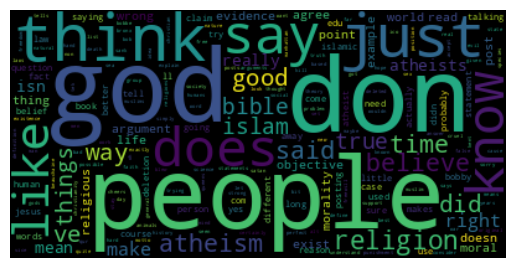

In [13]:
token_arr = count_vect.get_feature_names_out()
get_wordcloud(0, twenty_train.target, x_train_tf_no_idf, token_arr)

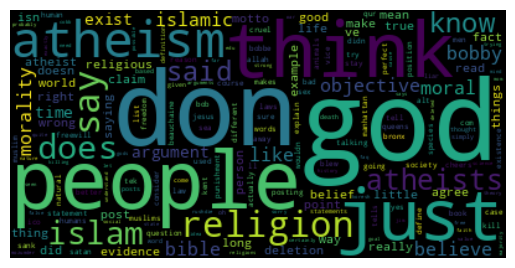

In [14]:
token_arr = count_vect.get_feature_names_out()
get_wordcloud(0, twenty_train.target, x_train_tf_idf, token_arr)

## comp.graphics class

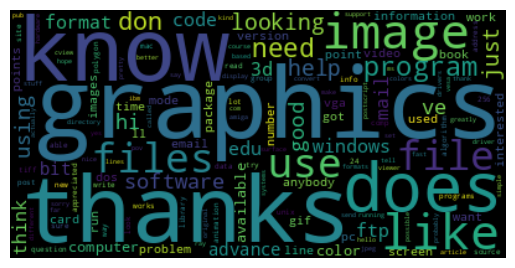

In [15]:
get_wordcloud(1, twenty_train.target, x_train_tf_no_idf, token_arr)

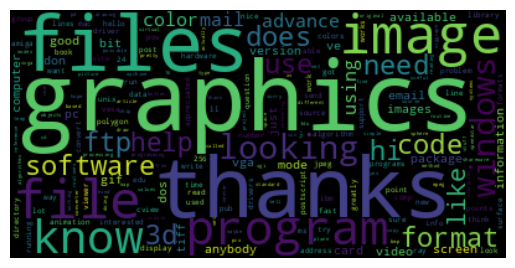

In [16]:
get_wordcloud(1, twenty_train.target, x_train_tf_idf, token_arr)

## sci.med class

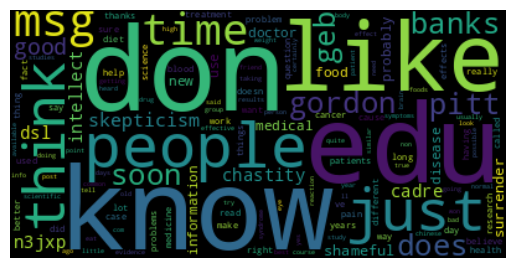

In [17]:
get_wordcloud(2, twenty_train.target, x_train_tf_no_idf, token_arr)

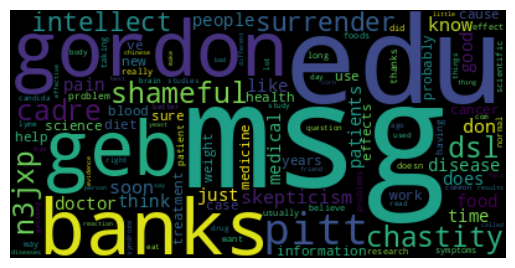

In [18]:
get_wordcloud(2, twenty_train.target, x_train_tf_idf, token_arr)

## soc.religion.christian class

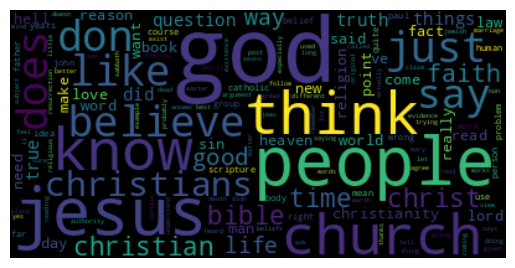

In [19]:
get_wordcloud(3, twenty_train.target, x_train_tf_no_idf, token_arr)

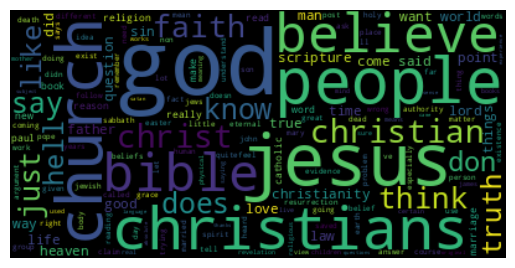

In [20]:
get_wordcloud(3, twenty_train.target, x_train_tf_idf, token_arr)

## Train a classifier

In BOW, each document is represented by a normalized vector of the size of the
vocabulary.

The vector can represent both the words count (frequency) or tf-idf vectors.

The classifier is called Niave Bayes since it relies on the bayes theorem.  
The goal is to find the posterior probability $p(y|x_i)$ of having a document of class
$y$ given the observation of a $x_i$ vector of `#j` features.  
The method is *naive* since it relies on the assumption that each couple of
features are independent.

The last hypotesis is of course naive since the words are linked together to
express a sentence.

Every Bayes methods build on top of a chosen prior probability $p(x_i|y)$.  
This is the likelihood of drawing a specific feature vector $x_i$ from the set of
documents of class $y$.

The multinomial Naive Bayes implement the following prior:

$p(x_i|y) = \frac{N_{y_i} + \alpha}{N_y + \alpha n}$

where $\alpha$ is a smoothing factor.  
The multinomial prior is a smoothed version of the feature relative frequency counting.  
This means that the equation expresses the probability of extracting a given feature
$x_i$ from the set of features available in all the documents of class $y$.  
$N_y$ is the number of features available for the $y$ class.  
$N_{y_i}$ is the number of times the feature $x_i$ appears in the documents of class $y$.

In [21]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(x_train_tf_idf, twenty_train.target)

In [22]:
# train on new data
docs_new = [
    "God does not exist",
    "God is love",
    "The heart is a pump of blood",
    "OpenGL on the GPU is fast",
]
x_new_counts = count_vect.transform(docs_new)
x_new_tf = tf_transformer.transform(x_new_counts)

preds = clf.predict(x_new_tf)

for doc, category in zip(docs_new, preds):
    print(f"'{doc}' => {twenty_train.target_names[category]}")

'God does not exist' => soc.religion.christian
'God is love' => soc.religion.christian
'The heart is a pump of blood' => sci.med
'OpenGL on the GPU is fast' => comp.graphics


In [23]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

# Build a pipeline and evaluate over the test set

In [24]:
# build a pipeline to join together the CountVectorizer, Tf-idf and MultinomialNB
from sklearn.pipeline import Pipeline

text_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", MultinomialNB()),
    ]
)
# fit pipeline
text_clf.fit(twenty_train.data, twenty_train.target)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [25]:
import numpy as np

# test set
twenty_test = fetch_20newsgroups(
    subset="test", categories=categories, shuffle=True, random_state=42
)

preds = text_clf.predict(twenty_test.data)
np.mean(preds == twenty_test.target)

0.7376830892143809

# Pipeline with SVM

Use a Support Vector Machine (SVM) to classify the text.

More info on the SVMs at [this link](https://scikit-learn.org/stable/modules/svm.html#svm).

In [26]:
from sklearn.linear_model import SGDClassifier

text_clf = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        (
            "clf",
            SGDClassifier(
                loss="hinge", penalty="l2", alpha=1e-3, random_state=42, tol=None
            ),
        ),
    ]
)

text_clf.fit(twenty_train.data, twenty_train.target)
preds = text_clf.predict(twenty_test.data)
np.mean(preds == twenty_test.target)

0.8521970705725699

In [27]:
# sklearn report utilities
from sklearn import metrics

print(
    metrics.classification_report(
        twenty_test.target, preds, target_names=twenty_test.target_names
    )
)

                        precision    recall  f1-score   support

           alt.atheism       0.87      0.61      0.72       319
         comp.graphics       0.85      0.97      0.91       389
               sci.med       0.90      0.88      0.89       396
soc.religion.christian       0.81      0.89      0.85       398

              accuracy                           0.85      1502
             macro avg       0.86      0.84      0.84      1502
          weighted avg       0.85      0.85      0.85      1502



In [28]:
metrics.confusion_matrix(twenty_test.target, preds)

array([[195,  17,  29,  78],
       [  4, 379,   3,   3],
       [  5,  37, 350,   4],
       [ 20,  13,   9, 356]])

# Parameter tuning with grid search

- vectorizer: unigrams or bigrams
- tf-idf: use_idf or not
- SVM: alpha

In [29]:
parameters = {
    "vect__ngram_range": [(1, 1), (1, 2)],
    "tfidf__use_idf": (True, False),
    "clf__alpha": (1e-3, 1e-2),
}

In [30]:
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(text_clf, parameters, cv=5, n_jobs=6)
# take only a subset of data for the grid search
gs_clf = gs_clf.fit(twenty_train.data[:400], twenty_train.target[:400])

In [31]:
gs_clf.best_score_

0.8

In [32]:
for p in sorted(parameters.keys()):
    print(f"{p}: {gs_clf.best_params_[p]}")

clf__alpha: 0.001
tfidf__use_idf: True
vect__ngram_range: (1, 1)


In [ ]:
import pandas as pd
pd.DataFrame(gs_clf.cv_results_)